<a href="https://colab.research.google.com/github/GE00881166/critical-thinking/blob/main/notebook6210a83bae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose, Activation, Dense, Dropout, Flatten, BatchNormalization,Reshape

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

from skimage.color import rgb2lab, lab2rgb, rgb2gray

import numpy as np
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
from PIL import Image
import os

batch_size = 64
new_size = (218, 178)

# Define the folder where your images are stored
folder = '/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/'
filenames = os.listdir(folder)
# Get a list of all the image filenames
filenames = [os.path.join(folder, f) for f in filenames]


def image_generator(filenames, batch_size=64):
    while True:
        
        
        # Get batches of filenames
        for i in range(0, len(filenames), batch_size):
            batch_filenames = filenames[i:i + batch_size]
            
            # Get the data for each batch of files
            x_batch = []
            y_batch = []
            for file in batch_filenames:
                # load the image and convert it to LUV
#                 img = tf.io.read_file(file)

#                 img = tf.image.decode_image(img, channels=3)
#                 img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2YUV)
                img  = img_to_array(load_img(file))

                # resize the image
                #img = cv2.resize(img, (178, 218))
                
                img = np.array(tf.image.resize(img,(218,178)))
                
                # separate the channels
#                 l_channel, u_channel, v_channel = cv2.split(img)
#                 l_channel = np.expand_dims(l_channel,axis =-1)
                
                img_l1 = rgb2lab(1.0/255*img)[:,:,0]
                img_ab1 = rgb2lab(1.0/255*img)[:,:,1:]
                img_l1 = np.expand_dims(img_l1,axis =-1)
                x_batch.append(img_l1)
                y_batch.append(img_ab1)
#                 print(l_channel.shape)
#                 print(np.array(x_batch).shape)
#                 print(np.array(y_batch).shape)
            yield (np.array(x_batch), np.array(y_batch))



float32
(218, 178, 3)
(218, 178)
(218, 178, 3)
(218, 178, 2)
float32


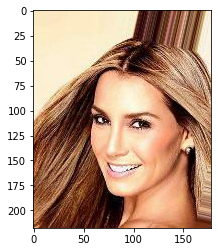

In [ ]:
import cv2
image_string = tf.io.read_file('/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/000001.jpg')
# Decode the image and convert it to a tensor
image_tensor = tf.image.decode_image(image_string, channels=3)
image_tensor = image_tensor/255
# Load the image:
image_1 = cv2.imread('/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/000001.jpg')
# Convert the image from RGB to YUV:
image_yuv = cv2.cvtColor(np.array(image_tensor), cv2.COLOR_RGB2YUV)
# Split the image into the Y, U, and V channels:
y, u, v = cv2.split(image_yuv)
pred_1 = np.zeros((218, 178,3))
image_yuv_2 = cv2.merge([u, v])

image_yuv_3 = cv2.merge([y,u, v])
print(image_yuv_3.dtype)
print(image_yuv_3.shape)
#y = np.expand_dims(y,axis =-1)
pred_1 = np.zeros((218, 178, 3))

print(pred_1[:,:,0].shape)
pred_1[:,:,0] = y


pred_1[:,:,1:] = image_yuv_2
print(pred_1.shape)
print(image_yuv_2.shape)

#Convert the image from the YUV color space back to the RGB color space:
image_rgb = cv2.cvtColor(image_yuv_3, cv2.COLOR_YUV2RGB)
print(image_rgb.dtype)
plt.imshow(image_rgb)


In [ ]:



y.shape

(218, 178)

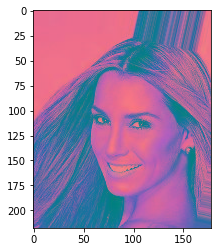

In [ ]:
plt.imshow(image_yuv,cmap = 'gray')

In [ ]:
a = image_yuv[:,:,2]

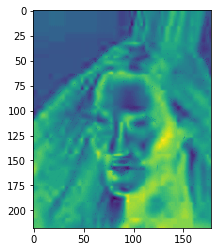

In [ ]:
plt.imshow(a)

In [ ]:
X1 = np.expand_dims(y , axis = 0)
X1 = np.expand_dims(X1 , axis = -1)
print(X1.shape)
Y1 = np.expand_dims(image_yuv_2,axis = 0)
print(Y1.shape)


(1, 218, 178, 1)
(1, 218, 178, 2)
